In [7]:
! pip install  plotly openpyxl

In [8]:
import os 
dir = 'C:\\Users\\lluri\\OneDrive - Northern Illinois University\\NIU\Students\\Graduates\\Samaneh\\'
os.listdir(dir)

['CASE_conference_application.docx',
 'Data',
 'Mie scattering.pptx',
 'Papers',
 'Progress Review April 2025.odp',
 'Samaneh_RAL_Jones_Questions.docx',
 'samaneh_thesis_timeline.xlsx',
 'samaneh_thesis_timeline_edited.xlsx',
 'Updated Progress Review April 10 2025']

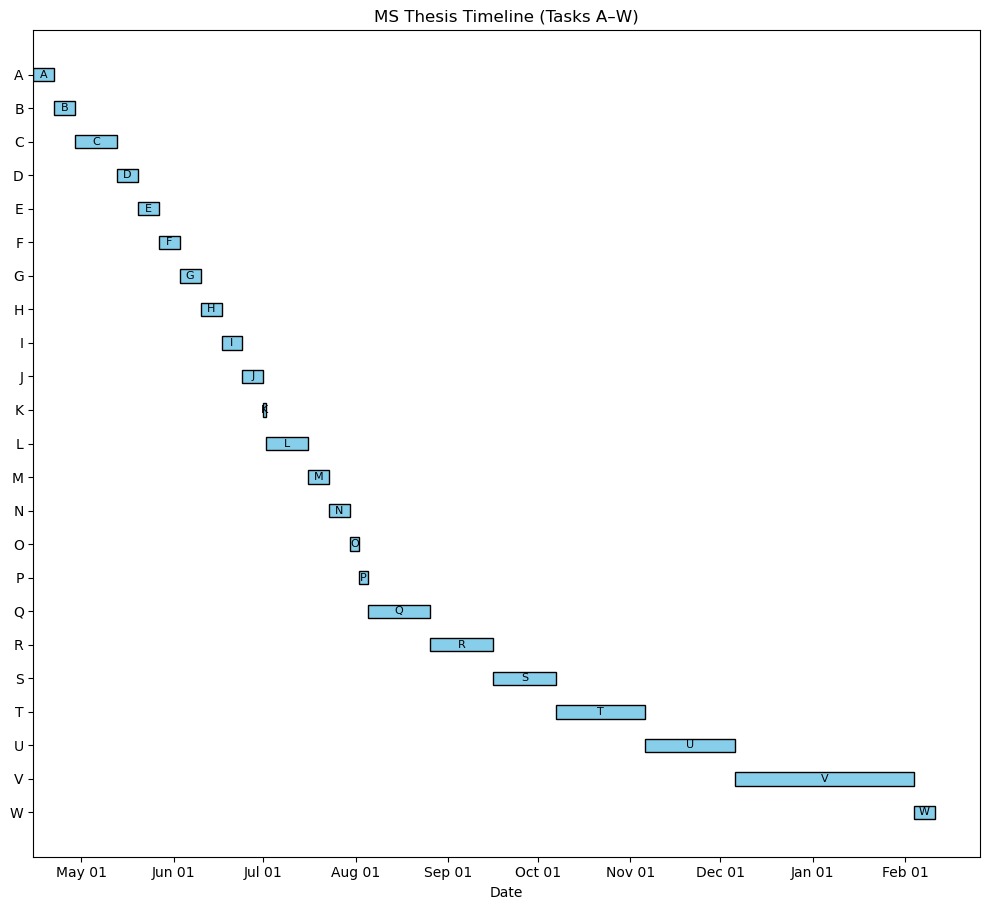


Task Key:
A: Compare measurement electronics (PASCO 550, oscilloscope) using exponential decay with reference capacitors to assess accuracy and analysis method in Python.
B: Design a buffer amplifier circuit to isolate D/A input characteristics from the amplifier. Include mechanical design: box, connectors, power supply.
C: Design the temperature control and measurement system using Pt100 thermistor, Peltier coolers, and Arduino-based resistance bridge.
D: Specify and order components: amplifier, connector box, power supply, battery, Arduino, calibration resistors and capacitors, Peltier coolers, thermistors, and mounting hardware.
E: Construct electronics and verify performance.
F: Construct and test temperature control components.
G: Measure reference capacitors (1 nF to 0.01 nF) to evaluate system accuracy for amplitude and phase using oscilloscope, Arduino, and PASCO 550.
H: Develop software to compute dielectric constant from capacitance data. Final implementation may use Arduino

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import string

# Load the Excel file
df = pd.read_excel(dir + "samaneh_thesis_timeline_edited.xlsx", sheet_name="Thesis Timeline")

# Parse durations
def parse_duration(text):
    if pd.isnull(text):
        return None
    text = str(text).strip().lower()
    if "week" in text:
        if "1/2" in text or "half" in text:
            return timedelta(days=3.5)
        try:
            num = float(text.split()[0])
            return timedelta(days=num * 7)
        except:
            return None
    elif "day" in text:
        try:
            num = float(text.split()[0])
            return timedelta(days=num)
        except:
            return None
    return None

# Filter and parse
df = df.dropna(subset=["Start date", "Expected time for each subphase", "Phase Breakdown"])
df["Duration"] = df["Expected time for each subphase"].apply(parse_duration)
df = df.dropna(subset=["Duration"])

# Assign task labels A, B, C...
task_names = list(df["Phase Breakdown"])
task_labels = list(string.ascii_uppercase[:len(task_names)])  # A, B, C, ...
start_dates = [pd.to_datetime(dt).to_pydatetime() for dt in df["Start date"]]
durations = [d.total_seconds() / (24 * 3600) for d in df["Duration"]]

# Plot
fig, ax = plt.subplots(figsize=(10, len(task_labels) * 0.4))

for i, (label, start, length) in enumerate(zip(task_labels, start_dates, durations)):
    ax.barh(i, length, left=start, height=0.4, color="skyblue", edgecolor="black")
    ax.text(start + timedelta(days=length / 2), i, label, va="center", ha="center", fontsize=8)

# Format axes
ax.set_yticks(range(len(task_labels)))
ax.set_yticklabels(task_labels)
ax.invert_yaxis()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xlabel("Date")
plt.title("MS Thesis Timeline (Tasks A–{})".format(task_labels[-1]))
plt.tight_layout()
plt.show()

# Print task key
print("\nTask Key:")
for label, name in zip(task_labels, task_names):
    print(f"{label}: {name}")


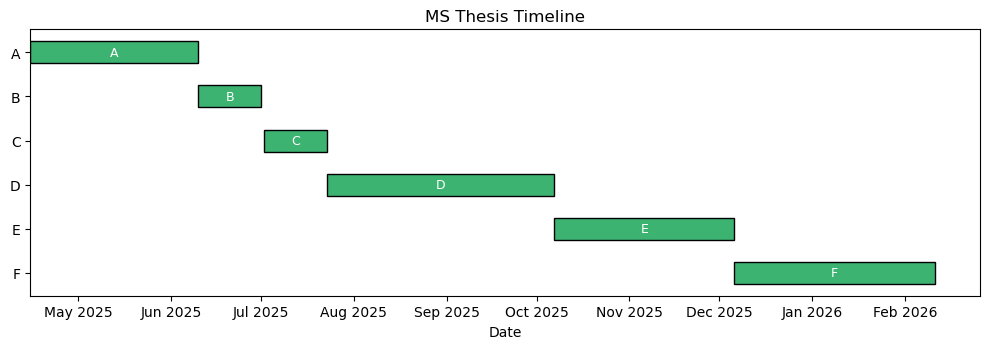

Task Key:

A: A: Design and Characterization of Dielectric Spectroscopy System
B: B: Modifications for Temperature Control and X-ray Measurements
C: C: Preliminary Measurements and System Evaluation
D: D: Sample Preparation and Data Collection
E: E: Comparative Analysis and Literature Review
F: F:  Writing and Presentation


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
import string

# Load Excel file
file_path = dir + "samaneh_thesis_timeline_edited.xlsx"
df = pd.read_excel(file_path, sheet_name="Thesis Timeline")

# Filter rows that contain the main phases with valid dates and durations
df = df.dropna(subset=["Phase", "Start date", "Expected time for each subphase (days)"])
df["Duration"] = df["Expected time for each subphase (days)"].apply(
    lambda x: timedelta(days=float(x)) if pd.notnull(x) else None
)
df = df.dropna(subset=["Duration"])

# Extract values
phase_names = list(df["Phase"])
start_dates = pd.to_datetime(df["Start date"]).to_list()
durations = df["Duration"].apply(lambda d: d.days).to_list()

# Assign short letter labels
letters = list(string.ascii_uppercase)
short_labels = letters[:len(phase_names)]

# Plot Gantt chart
fig, ax = plt.subplots(figsize=(10, len(short_labels) * 0.6))

for i, (label, start, days) in enumerate(zip(short_labels, start_dates, durations)):
    ax.barh(i, days, left=start, height=0.5, color="mediumseagreen", edgecolor="black")
    ax.text(start + timedelta(days=days / 2), i, label, va="center", ha="center", fontsize=9, color="white")

ax.set_yticks(range(len(short_labels)))
ax.set_yticklabels(short_labels)
ax.invert_yaxis()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel("Date")
plt.title("MS Thesis Timeline")
plt.tight_layout()
plt.show()

# Print text key
print("Task Key:\n")
for label, phase in zip(short_labels, phase_names):
    print(f"{label}: {phase}")
